Chakri's uncle, who likes to know about tech and also always thinks about how to be healthy and fit. Whenever he saw NEWS he finds out that there are heart related diseases so he got afraid that he will have heart disease in the future.So he wants to check if he gets heart disease or not so that he will try to prevent the disease. *'I agree with him for sure'* .Then he asked his nephew chakri to predict, but poor chakri didn't know how to do it he asked us for the help to do it. So we will now build models to get the job done.

First let's import some modules we will import some later in the story but we can do with these for now

In [793]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

**Find the right data and get it into the story**

Get Dataset from here  [DATA](https://https://ieee-dataport.org/open-access/heart-disease-dataset-comprehensive#files.)

In [794]:
og_data = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")
data = og_data

What's the data look like...

In [795]:
data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


From the first glance we can see that all the feature values are in numerical format, but let's check it.

In [796]:
data.dtypes

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

Our previous guess is correct

Now how much data do we have

In [797]:
data.shape

(1190, 12)

This data is so less to work with but let's wait and see how this will turn out before we build the model

The summary of the data is..

In [798]:
data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


Let's just observe the summary for a second, what i got from my first glance is that 
* it doesn't have any NAN values in it
* then the maximum people who have disease are from 47 to 60.
* both male and female data is there
* several features have `min` value 0.0 (resting bp s, cholesterol, fasting blood sugar, resting ecg, exercise angina)
* oldpeak is even in negative value
to make any decisions from these points we should have some domain knowledge, so now i'm not going to check them to verify I assume that these are correct.

Are there really no NAN values in the data?

In [799]:
data.isna().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

There are really no NAN values, we should always check our observations and intuitions on the data

Are there any duplicated rows are there?

In [800]:
data[data.duplicated]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
163,49,0,2,110,208,0,0,160,0,0.0,1,0
604,58,1,3,150,219,0,1,118,1,0.0,2,1
887,63,1,1,145,233,1,2,150,0,2.3,3,0
888,67,1,4,160,286,0,2,108,1,1.5,2,1
889,67,1,4,120,229,0,2,129,1,2.6,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1156,42,1,3,130,180,0,0,150,0,0.0,1,0
1157,61,1,4,140,207,0,2,138,1,1.9,1,1
1158,66,1,4,160,228,0,2,138,0,2.3,1,0
1159,46,1,4,140,311,0,0,120,1,1.8,2,1


This is bad, there are so many duplicates and our data is also low.But we need to remove the duplicates

In [801]:
data.drop_duplicates(inplace=True)

After deletion we are left with 918 rows × 12 columns

How many male and female are in total?

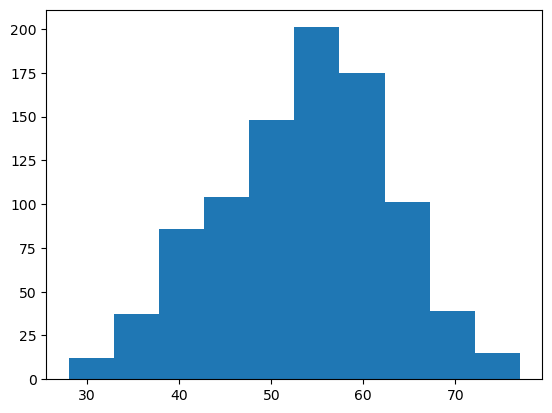

In [802]:
plt.hist(data['age'], bins = 10)
plt.show()

our earlier observation is true about the age of the people

How many males and females are there?

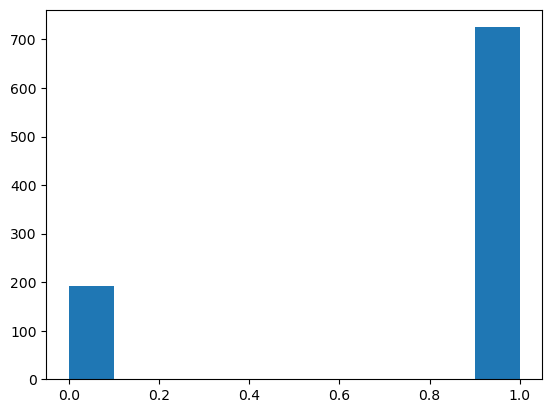

In [803]:
plt.hist(data['sex'])
plt.show()

In [804]:
data['sex'].value_counts()

sex
1    725
0    193
Name: count, dtype: int64

Maximum records are from males

How many of the people have disease?

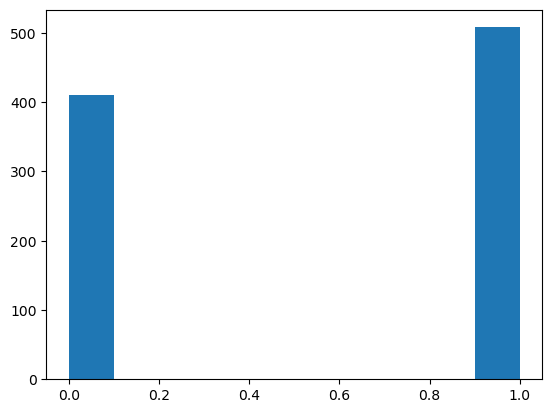

In [805]:
plt.hist(data['target'])
plt.show()

In [806]:
data['target'].value_counts()

target
1    508
0    410
Name: count, dtype: int64

I will say they are pretty much balanced 

How can we say that who have disease or not?

In [807]:
# md = 0
# mnd = 0
# fd = 0
# fnd = 0
# for i in range(0, data.shape[0]):
#     if data['sex'] == 1 and data['target'] == 1:
#         md = md + 1
#     if data['sex'] == 1 and data['target'] == 0:
#         mnd = mnd + 1
#     if data['sex'] == 0 and data['target'] == 1:
#         fd = fd + 1
#     if data['sex'] == 0 and data['target'] == 0:
#         fnd = fnd + 1
        
# print(f"Males who have disese : {md}\nMales who don't have disease : {mnd}\nFemales who have disease : {fd}\nFemales who don't have disease : {fnd}")

From the suggestion of chakri, we are going to remove the samples of dataset which have `cholesterol` = 0 and `ST slope` = 0

In [808]:
data = data[data['cholesterol'] != 0]

In [809]:
data.shape

(746, 12)

In [810]:
data = data[data['ST slope'] != 0]

From the above operations the final data set we received is of shape

In [811]:
data.shape

(745, 12)

now let's split data to data with only features and data with target

In [812]:
X = data.drop("target", axis=1)  # Assuming "target" is the disease label
y = data["target"]

In [813]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

Shapes of the splitted data are as follows

In [814]:
X_train.shape

(596, 11)

In [815]:
X_test.shape

(149, 11)

In [816]:
y_train.shape

(596,)

In [817]:
y_test.shape

(149,)

Now let's train the cart model with this data to get the predictions

In [818]:
model = DecisionTreeClassifier()  # Adjust max_depth as needed
model.fit(X_train, y_train)

DecisionTreeClassifier()

Predicting the values with our trained model

In [819]:
predictions = model.predict(X_test)

Checking the metrics of the model

In [820]:
    accuracy = accuracy_score(y_test, predictions)
    print("Test Accuracy:", accuracy)

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

    # Calculate sensitivity (true positive rate or recall)
    sensitivity = tp / (tp + fn)
    print("Sensitivity (True Positive Rate):", sensitivity)

    # Calculate specificity (true negative rate)
    specificity = tn / (tn + fp)
    print("Specificity (True Negative Rate):", specificity)

    # Calculate precision
    precision = precision_score(y_test, predictions)
    print("Precision:", precision)

Test Accuracy: 0.8187919463087249
Sensitivity (True Positive Rate): 0.8266666666666667
Specificity (True Negative Rate): 0.8108108108108109
Precision: 0.8157894736842105


In [821]:
# metrics._plot.confusion_matrix.ConfusionMatrixDisplay(confusion_matrix(y_test, predictions))

So, let's call uncle to tell our status.
* ...........................................
* Uncle : So how's work going on son?
* Me    : All good uncle, we got 0.8187919463087249 accuracy for the test data.Do you like it? want to try it?
* Uncle : Hmmm... What you did is good but I do want the accuracy to be little bit more and can you do it with the all trendy             neural network.
* Me    : You know about neural network too? You sure are updated uncle.
* Uncle : Thanks, so do with that and bring it to me then you may get a treat.Don't forget it's uncle special recipe.
* Me    : Consider it done uncle.
* ...........................................

So shall we do this one more time with a differnt approach..Let's do this!

I going to go be a bit more creative and do the pearson correlation coefficients for the features to remove unwanted coefficients and then apply K-means clustering to identify any irregularities in the data.Then we will build a neural model to help us do the classification.

Now doing the pearson correlation for the data

<Axes: >

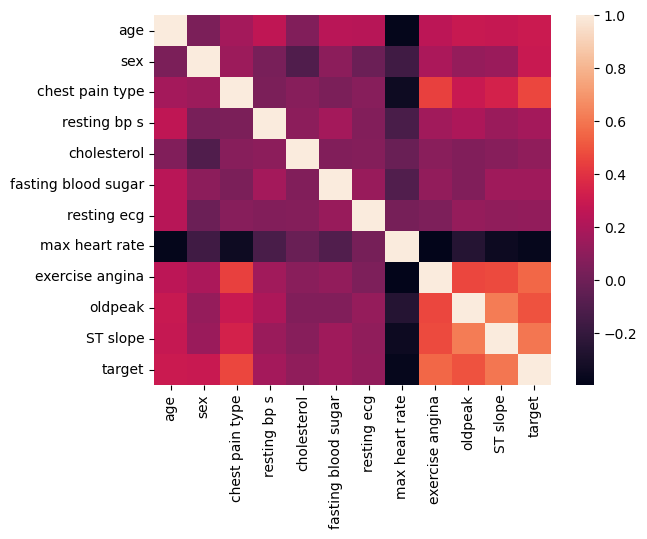

In [822]:
sns.heatmap(data.corr(method = 'pearson'))

In [823]:
data.corr()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
age,1.000000,0.039779,0.174383,0.258372,0.060684,0.237774,0.232490,-0.382074,0.248123,0.288430,0.284529,0.297104
sex,0.039779,1.000000,0.146502,0.033643,-0.106478,0.094712,-0.012935,-0.156792,0.193305,0.126472,0.142360,0.292259
chest pain type,0.174383,0.146502,1.000000,0.043763,0.079730,0.044108,0.078577,-0.344157,0.447485,0.292894,0.338638,0.463768
resting bp s,0.258372,0.033643,0.043763,1.000000,0.097156,0.171508,0.063224,-0.125422,0.162252,0.199909,0.143114,0.172099
cholesterol,0.060684,-0.106478,0.079730,0.097156,1.000000,0.056741,0.067000,-0.020245,0.085954,0.057595,0.079352,0.105172
fasting blood sugar,0.237774,0.094712,0.044108,0.171508,0.056741,1.000000,0.135864,-0.102054,0.112785,0.058307,0.156298,0.158107
resting ecg,0.232490,-0.012935,0.078577,0.063224,0.067000,0.135864,1.000000,0.025116,0.046861,0.124458,0.109588,0.114462
max heart rate,-0.382074,-0.156792,-0.344157,-0.125422,-0.020245,-0.102054,0.025116,1.000000,-0.396842,-0.260055,-0.349753,-0.377046
exercise angina,0.248123,0.193305,0.447485,0.162252,0.085954,0.112785,0.046861,-0.396842,1.000000,0.465014,0.474620,0.553585
oldpeak,0.288430,0.126472,0.292894,0.199909,0.057595,0.058307,0.124458,-0.260055,0.465014,1.000000,0.615222,0.497480


There are no significant correlation ( i.e 0.7 to 1) between two features so there is no need to remove any features.

Let's do the k-means clustering on the data

Shape of the remaining data

In [824]:
data.shape

(745, 12)

Now we will plot a sctterplot for the data to identify and remove the outliers using k means clustering

C:\PROJECTS\sample_projects\project1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\PROJECTS\sample_projects\project1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


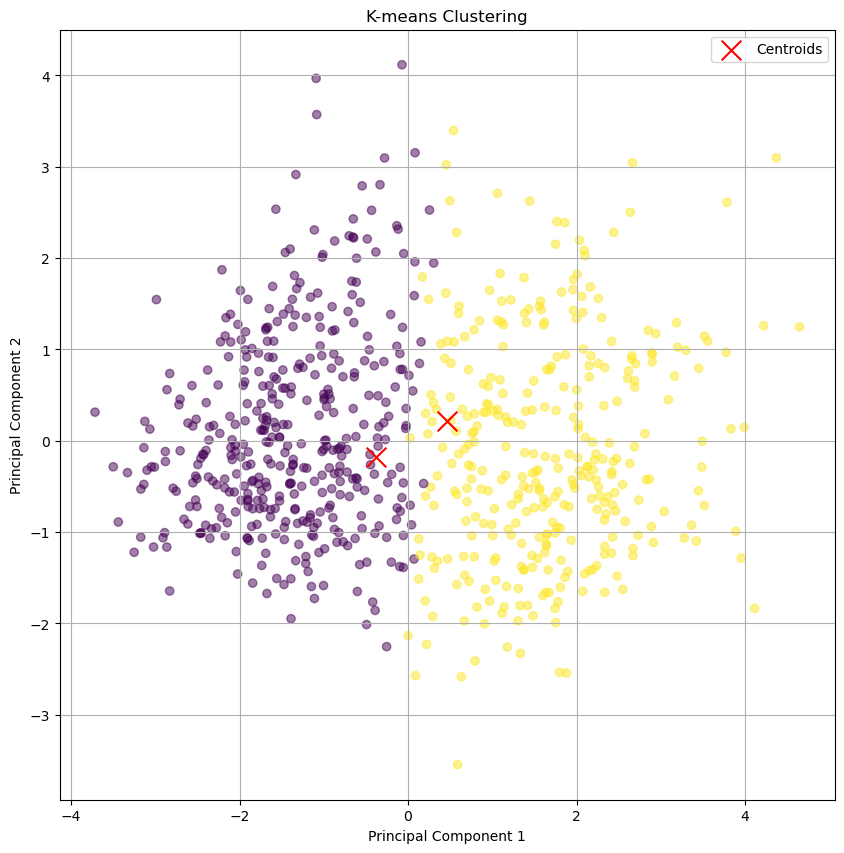

In [825]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
%matplotlib inline

# Extract features and target variable
X = data.iloc[:, :11].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA to visualize in 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Perform K-means clustering
k = 2  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualize the clusters
plt.figure(figsize=(10, 10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red', s=200, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

We will now identify the outliers and remove them from the data

In [826]:
# Identifying outliers
distances = cdist(X_scaled, centroids, 'euclidean')
min_distances = np.min(distances, axis=1)
threshold = np.percentile(min_distances, 95)  # Adjust percentile as needed
outliers_indices = np.where(min_distances > threshold)[0]
outliers = data.iloc[outliers_indices]

print("Identified outliers:")
print(outliers)

# Remove outliers
for i in outliers.index:
    if i in data.index:
        data = data.drop(i)

Identified outliers:
     age  sex  chest pain type  resting bp s  cholesterol  \
28    53    0                2           113          468   
30    53    1                3           145          518   
76    32    1                4           118          529   
103   40    1                4           120          466   
109   39    1                2           190          241   
123   58    0                2           180          393   
149   54    1                4           130          603   
228   38    1                4            92          117   
251   44    1                4           135          491   
483   67    1                1           142          270   
497   58    1                4           132          458   
542   76    1                3           104          113   
545   61    0                2           140          298   
548   61    1                1           142          200   
574   72    1                4           160          123   
593

In [827]:
cleaned_data = data

Now after removing the outliers, let's see how our data is

In [828]:
cleaned_data.shape

(707, 12)

In [829]:
len(outliers.index)

38

Total of 38 outliers are removed from the data

Now splitting the data into train and test data

In [830]:
X = data.drop("target", axis=1)
y = data["target"]

In [831]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

Shape of the splitted data is

In [832]:
X_train.shape

(565, 11)

In [833]:
y_train.shape

(565,)

In [834]:
X_test.shape

(142, 11)

In [835]:
y_test.shape

(142,)

Now comes the time to prepare the main dish that is to make a Artificial Neural Network model

In [836]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.utils import plot_model

In [837]:
Annmodel=Sequential()

Annmodel.add(Dense(20,input_shape=(11,),activation='relu'))

#Annmodel.add(Dense(30,activation='relu'))
Annmodel.add(Dense(40,activation='relu'))
Annmodel.add(Dense(50,activation='relu'))
Annmodel.add(Dense(40,activation='relu'))
# Annmodel.add(Dense(30,activation='relu'))
Annmodel.add(Dense(20,activation='relu'))
Annmodel.add(Dense(10,activation='relu'))
# Annmodel.add(Dense(5,activation='relu'))
#Annmodel.add(Dense(50,activation='relu'))
#Annmodel.add(Dense(100,activation='relu'))
#Annmodel.add(Dense(60,activation='relu'))
#Annmodel.add(Dense(30,activation='relu'))
#Annmodel.add(Dense(20,activation='relu'))
Annmodel.add(Dense(10,activation='relu'))

Annmodel.add(Dense(1,activation='sigmoid'))
Annmodel.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_323 (Dense)           (None, 20)                240       
                                                                 
 dense_324 (Dense)           (None, 40)                840       
                                                                 
 dense_325 (Dense)           (None, 50)                2050      
                                                                 
 dense_326 (Dense)           (None, 40)                2040      
                                                                 
 dense_327 (Dense)           (None, 20)                820       
                                                                 
 dense_328 (Dense)           (None, 10)                210       
                                                                 
 dense_329 (Dense)           (None, 10)              

In [838]:
plot_model(Annmodel,show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [839]:
Annmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [840]:
%%time
h=Annmodel.fit(X_train, y_train, epochs = 20, batch_size = 5)

Epoch 1/20
113/113 [==============================] - 1s 3ms/step - loss: 0.6706 - accuracy: 0.6106
Epoch 2/20
113/113 [==============================] - 0s 3ms/step - loss: 0.6215 - accuracy: 0.6655
Epoch 3/20
113/113 [==============================] - 0s 3ms/step - loss: 0.6001 - accuracy: 0.6832
Epoch 4/20
113/113 [==============================] - 0s 3ms/step - loss: 0.5810 - accuracy: 0.7239
Epoch 5/20
113/113 [==============================] - 0s 3ms/step - loss: 0.5866 - accuracy: 0.6903
Epoch 6/20
113/113 [==============================] - 0s 4ms/step - loss: 0.5762 - accuracy: 0.7257
Epoch 7/20
113/113 [==============================] - 0s 4ms/step - loss: 0.5646 - accuracy: 0.7257
Epoch 8/20
113/113 [==============================] - 0s 4ms/step - loss: 0.5530 - accuracy: 0.7257
Epoch 9/20
113/113 [==============================] - 0s 4ms/step - loss: 0.5464 - accuracy: 0.7451
Epoch 10/20
113/113 [==============================] - 0s 4ms/step - loss: 0.5432 - accuracy: 0.7327

In [841]:
# Make predictions on the test set
y_pred = Annmodel.predict(X_test)

5/5 [==============================] - 0s 3ms/step


In [842]:
y_pred

array([[0.36244607],
       [0.0818149 ],
       [0.76737934],
       [0.20000593],
       [0.8768762 ],
       [0.26508373],
       [0.5784029 ],
       [0.8969386 ],
       [0.03269255],
       [0.7997591 ],
       [0.38762826],
       [0.03327345],
       [0.948598  ],
       [0.20753242],
       [0.40888458],
       [0.87331754],
       [0.4780325 ],
       [0.28869855],
       [0.1841994 ],
       [0.30131772],
       [0.48246375],
       [0.8707339 ],
       [0.89712876],
       [0.13862188],
       [0.12430583],
       [0.88298374],
       [0.11389904],
       [0.46715602],
       [0.02810674],
       [0.18284173],
       [0.8043122 ],
       [0.07209273],
       [0.92125434],
       [0.17891751],
       [0.71804273],
       [0.92282677],
       [0.18134661],
       [0.35913637],
       [0.683837  ],
       [0.529518  ],
       [0.20441595],
       [0.87093484],
       [0.12956773],
       [0.87685835],
       [0.6177056 ],
       [0.7801741 ],
       [0.20887083],
       [0.959

In [843]:
rounded = [round(x[0]) for x in y_pred]

In [844]:
y_pred = rounded

In [845]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate sensitivity (true positive rate or recall)
sensitivity = tp / (tp + fn)
print("Sensitivity (True Positive Rate):", sensitivity)

# Calculate specificity (true negative rate)
specificity = tn / (tn + fp)
print("Specificity (True Negative Rate):", specificity)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Test Accuracy: 0.823943661971831
Sensitivity (True Positive Rate): 0.8
Specificity (True Negative Rate): 0.8390804597701149
Precision: 0.7586206896551724


We did our best to improve the accuracy with ANN but it is not much, however we can improve it by building some good ANN and tune it accordingly.But finally uncle is satisfied with our efforts and gave us his special dish. Also he does not have heart disease. Hopefully may our model is right in it's prediction.